# Data Preparation and Feature Creation

## Arithmetic Operations

In [11]:
import pandas as pd
import numpy as np

In [12]:
titanic = pd.read_csv("titanic.csv")

In [13]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
5,0,3,male,NaN,0,0,8.4583,Q,NaN
6,0,1,male,54.0,0,0,51.8625,S,E
7,0,3,male,2.0,3,1,21.0750,S,NaN
8,1,3,female,27.0,0,2,11.1333,S,NaN
9,1,2,female,14.0,1,0,30.0708,C,NaN


In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [15]:
titanic.age.fillna(titanic.age.mean(), inplace = True)

In [16]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.000000,1,0,7.2500,S,NaN
1,1,1,female,38.000000,1,0,71.2833,C,C
2,1,3,female,26.000000,0,0,7.9250,S,NaN
3,1,1,female,35.000000,1,0,53.1000,S,C
4,0,3,male,35.000000,0,0,8.0500,S,NaN
5,0,3,male,29.699118,0,0,8.4583,Q,NaN
6,0,1,male,54.000000,0,0,51.8625,S,E
7,0,3,male,2.000000,3,1,21.0750,S,NaN
8,1,3,female,27.000000,0,2,11.1333,S,NaN
9,1,2,female,14.000000,1,0,30.0708,C,NaN


### Add/Sub/Mul/Div Columns

In [17]:
titanic.sibsp + titanic.parch

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 891, dtype: int64

In [18]:
titanic.sibsp.add(titanic.parch)

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 891, dtype: int64

In [19]:
titanic["no_relat"] = titanic.sibsp.add(titanic.parch)

In [20]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,no_relat
0,0,3,male,22.000000,1,0,7.2500,S,NaN,1
1,1,1,female,38.000000,1,0,71.2833,C,C,1
2,1,3,female,26.000000,0,0,7.9250,S,NaN,0
3,1,1,female,35.000000,1,0,53.1000,S,C,1
4,0,3,male,35.000000,0,0,8.0500,S,NaN,0
5,0,3,male,29.699118,0,0,8.4583,Q,NaN,0
6,0,1,male,54.000000,0,0,51.8625,S,E,0
7,0,3,male,2.000000,3,1,21.0750,S,NaN,4
8,1,3,female,27.000000,0,2,11.1333,S,NaN,2
9,1,2,female,14.000000,1,0,30.0708,C,NaN,1


In [21]:
sales = pd.read_csv("sales.csv", index_col = 0)

In [22]:
sales

,Mon,Tue,Wed,Thu,Fri
Steven,34,27,15,NaN,33
Mike,45,9,74,87.0,12
Andi,17,33,54,8.0,29
Paul,87,67,27,45.0,7


In [23]:
sales.Mon + sales.Thu

Steven      NaN
Mike      132.0
Andi       25.0
Paul      132.0
dtype: float64

In [24]:
sales.Mon.add(sales.Thu)

Steven      NaN
Mike      132.0
Andi       25.0
Paul      132.0
dtype: float64

add method is faster for larger datasets

In [25]:
sales.Mon.add(sales.Thu, fill_value = 0)

Steven     34.0
Mike      132.0
Andi       25.0
Paul      132.0
dtype: float64

In [26]:
sales["perc_Bonus"] = [0.12, 0.15, 0.10, 0.20]

In [27]:
sales

,Mon,Tue,Wed,Thu,Fri,perc_Bonus
Steven,34,27,15,NaN,33,0.12
Mike,45,9,74,87.0,12,0.15
Andi,17,33,54,8.0,29,0.10
Paul,87,67,27,45.0,7,0.20


In [29]:
sales.Thu * sales.perc_Bonus

Steven      NaN
Mike      13.05
Andi       0.80
Paul       9.00
dtype: float64

In [30]:
sales.Thu.mul(sales.perc_Bonus, fill_value = 0)

Steven     0.00
Mike      13.05
Andi       0.80
Paul       9.00
dtype: float64

In [31]:
sales.iloc[:, :-1]#.sum(axis -1).mul(sales.perc_Bonus)

,Mon,Tue,Wed,Thu,Fri
Steven,34,27,15,NaN,33
Mike,45,9,74,87.0,12
Andi,17,33,54,8.0,29
Paul,87,67,27,45.0,7


In [34]:
sales.iloc[:, :-1].sum(axis = 1)#.mul(sales.perc_Bonus)

Steven    109.0
Mike      227.0
Andi      141.0
Paul      233.0
dtype: float64

In [37]:
sales["Bonus"] = sales.iloc[:, :-1].sum(axis = 1).mul(sales.perc_Bonus)

In [38]:
sales

,Mon,Tue,Wed,Thu,Fri,perc_Bonus,Bonus
Steven,34,27,15,NaN,33,0.12,13.08
Mike,45,9,74,87.0,12,0.15,34.05
Andi,17,33,54,8.0,29,0.10,14.10
Paul,87,67,27,45.0,7,0.20,46.60


### Add/Sub/Mul/Div with Scalar Value

In [39]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,no_relat
0,0,3,male,22.0,1,0,7.2500,S,NaN,1
1,1,1,female,38.0,1,0,71.2833,C,C,1
2,1,3,female,26.0,0,0,7.9250,S,NaN,0
3,1,1,female,35.0,1,0,53.1000,S,C,1
4,0,3,male,35.0,0,0,8.0500,S,NaN,0


In [40]:
1912 - titanic.age

0      1890.000000
1      1874.000000
2      1886.000000
3      1877.000000
4      1877.000000
          ...     
886    1885.000000
887    1893.000000
888    1882.300882
889    1886.000000
890    1880.000000
Name: age, Length: 891, dtype: float64

In [46]:
titanic["YoB"] = titanic.age.sub(1912).mul(-1).round(1)

In [47]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,no_relat,YoB
0,0,3,male,22.000000,1,0,7.2500,S,NaN,1,1890.0
1,1,1,female,38.000000,1,0,71.2833,C,C,1,1874.0
2,1,3,female,26.000000,0,0,7.9250,S,NaN,0,1886.0
3,1,1,female,35.000000,1,0,53.1000,S,C,1,1877.0
4,0,3,male,35.000000,0,0,8.0500,S,NaN,0,1877.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,NaN,0,1885.0
887,1,1,female,19.000000,0,0,30.0000,S,B,0,1893.0
888,0,3,female,29.699118,1,2,23.4500,S,NaN,3,1882.3
889,1,1,male,26.000000,0,0,30.0000,C,C,0,1886.0


In [48]:
fx_rate = 1.1

In [51]:
titanic["EUR_fare"] = titanic.fare.div(fx_rate).round(2)

In [52]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,no_relat,YoB,EUR_fare
0,0,3,male,22.000000,1,0,7.2500,S,NaN,1,1890.0,6.59
1,1,1,female,38.000000,1,0,71.2833,C,C,1,1874.0,64.80
2,1,3,female,26.000000,0,0,7.9250,S,NaN,0,1886.0,7.20
3,1,1,female,35.000000,1,0,53.1000,S,C,1,1877.0,48.27
4,0,3,male,35.000000,0,0,8.0500,S,NaN,0,1877.0,7.32
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,NaN,0,1885.0,11.82
887,1,1,female,19.000000,0,0,30.0000,S,B,0,1893.0,27.27
888,0,3,female,29.699118,1,2,23.4500,S,NaN,3,1882.3,21.32
889,1,1,male,26.000000,0,0,30.0000,C,C,0,1886.0,27.27


In [53]:
titanic.drop(columns = ["sibsp", "parch", "deck", "YoB", "EUR_fare"], inplace = True)

In [54]:
titanic

,survived,pclass,sex,age,fare,embarked,no_relat
0,0,3,male,22.000000,7.2500,S,1
1,1,1,female,38.000000,71.2833,C,1
2,1,3,female,26.000000,7.9250,S,0
3,1,1,female,35.000000,53.1000,S,1
4,0,3,male,35.000000,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S,0
887,1,1,female,19.000000,30.0000,S,0
888,0,3,female,29.699118,23.4500,S,3
889,1,1,male,26.000000,30.0000,C,0


In [55]:
sales

,Mon,Tue,Wed,Thu,Fri,perc_Bonus,Bonus
Steven,34,27,15,NaN,33,0.12,13.08
Mike,45,9,74,87.0,12,0.15,34.05
Andi,17,33,54,8.0,29,0.10,14.10
Paul,87,67,27,45.0,7,0.20,46.60


In [56]:
fixed_costs = 5

In [59]:
sales.iloc[:, :-2].sub(fixed_costs, fill_value = 0)

,Mon,Tue,Wed,Thu,Fri
Steven,29,22,10,-5.0,28
Mike,40,4,69,82.0,7
Andi,12,28,49,3.0,24
Paul,82,62,22,40.0,2


In [60]:
perc_Bonus = 0.1

In [61]:
sales.iloc[:, :-2].mul(perc_Bonus, fill_value = 0)

,Mon,Tue,Wed,Thu,Fri
Steven,3.4,2.7,1.5,0.0,3.3
Mike,4.5,0.9,7.4,8.7,1.2
Andi,1.7,3.3,5.4,0.8,2.9
Paul,8.7,6.7,2.7,4.5,0.7


In [62]:
sales.iloc[:, :-2]

,Mon,Tue,Wed,Thu,Fri
Steven,34,27,15,NaN,33
Mike,45,9,74,87.0,12
Andi,17,33,54,8.0,29
Paul,87,67,27,45.0,7


In [63]:
lot_size = 10
bonus_per_lot = 1.25

In [65]:
sales.iloc[:, :-2]#.floordiv(lot_size, fill_value = 0).mul(bonus_per_lot).sum(axis = 1)

,Mon,Tue,Wed,Thu,Fri
Steven,34,27,15,NaN,33
Mike,45,9,74,87.0,12
Andi,17,33,54,8.0,29
Paul,87,67,27,45.0,7


In [67]:
sales.iloc[:, :-2].floordiv(lot_size, fill_value = 0)#.mul(bonus_per_lot).sum(axis = 1)

,Mon,Tue,Wed,Thu,Fri
Steven,3,2,1,0.0,3
Mike,4,0,7,8.0,1
Andi,1,3,5,0.0,2
Paul,8,6,2,4.0,0


floordiv will round down to the nearest integer

In [68]:
sales.iloc[:, :-2].floordiv(lot_size, fill_value = 0).mul(bonus_per_lot).sum(axis = 1)

Steven    11.25
Mike      25.00
Andi      13.75
Paul      25.00
dtype: float64

## Transformation/Mapping

In [69]:
summer = pd.read_csv("summer.csv")

In [70]:
summer

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [71]:
sample = summer.sample(n = 7, random_state = 123).sort_values(by = "Year")

In [72]:
sample

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
4196,1924,Paris,Aquatics,Water polo,"AUSTIN, Arthur",USA,Men,Water Polo,Bronze
11961,1968,Mexico,Athletics,Athletics,"FOSBURY, Richard Douglas",USA,Men,High Jump,Gold
11742,1968,Mexico,Aquatics,Swimming,"WENDEN, Michael Vincent",AUS,Men,200M Freestyle,Gold
13996,1976,Montreal,Aquatics,Swimming,"MAC DONALD, Gary",CAN,Men,4X100M Medley Relay,Silver
16229,1980,Moscow,Rowing,Rowing,"DMITRIENKO, Grigori",URS,Men,Eight With Coxswain (8+),Bronze
19728,1992,Barcelona,Aquatics,Swimming,"KULIKOV, Vladislav",EUN,Men,4X100M Medley Relay,Silver
25901,2004,Athens,Boxing,Boxing,"YELEUOV, Serik",KAZ,Men,57 - 60KG (Lightweight),Bronze


In [73]:
city_country = {"Paris": "France", "Mexico": "Mexico", "Montreal": "Canada", "Moscow": "Russia", "Barcelona": "Spain", "Athens": "Greece"}

In [74]:
city_country

{'Paris': 'France',
 'Mexico': 'Mexico',
 'Montreal': 'Canada',
 'Moscow': 'Russia',
 'Barcelona': 'Spain',
 'Athens': 'Greece'}

In [75]:
sample.City.map(city_country)

4196     France
11961    Mexico
11742    Mexico
13996    Canada
16229    Russia
19728     Spain
25901    Greece
Name: City, dtype: object

In [76]:
sample["Host_Country"] = sample.City.map(city_country)

In [77]:
sample

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Host_Country
4196,1924,Paris,Aquatics,Water polo,"AUSTIN, Arthur",USA,Men,Water Polo,Bronze,France
11961,1968,Mexico,Athletics,Athletics,"FOSBURY, Richard Douglas",USA,Men,High Jump,Gold,Mexico
11742,1968,Mexico,Aquatics,Swimming,"WENDEN, Michael Vincent",AUS,Men,200M Freestyle,Gold,Mexico
13996,1976,Montreal,Aquatics,Swimming,"MAC DONALD, Gary",CAN,Men,4X100M Medley Relay,Silver,Canada
16229,1980,Moscow,Rowing,Rowing,"DMITRIENKO, Grigori",URS,Men,Eight With Coxswain (8+),Bronze,Russia
19728,1992,Barcelona,Aquatics,Swimming,"KULIKOV, Vladislav",EUN,Men,4X100M Medley Relay,Silver,Spain
25901,2004,Athens,Boxing,Boxing,"YELEUOV, Serik",KAZ,Men,57 - 60KG (Lightweight),Bronze,Greece


In [78]:
titanic

,survived,pclass,sex,age,fare,embarked,no_relat
0,0,3,male,22.000000,7.2500,S,1
1,1,1,female,38.000000,71.2833,C,1
2,1,3,female,26.000000,7.9250,S,0
3,1,1,female,35.000000,53.1000,S,1
4,0,3,male,35.000000,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S,0
887,1,1,female,19.000000,30.0000,S,0
888,0,3,female,29.699118,23.4500,S,3
889,1,1,male,26.000000,30.0000,C,0


In [79]:
mapper = {1: "First", 2: "Second", 3: "Third"}

In [80]:
titanic.pclass.map(mapper)

0       Third
1       First
2       Third
3       First
4       Third
        ...  
886    Second
887     First
888     Third
889     First
890     Third
Name: pclass, Length: 891, dtype: object

In [81]:
titanic.pclass = titanic.pclass.map(mapper)

In [82]:
titanic

,survived,pclass,sex,age,fare,embarked,no_relat
0,0,Third,male,22.000000,7.2500,S,1
1,1,First,female,38.000000,71.2833,C,1
2,1,Third,female,26.000000,7.9250,S,0
3,1,First,female,35.000000,53.1000,S,1
4,0,Third,male,35.000000,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,Second,male,27.000000,13.0000,S,0
887,1,First,female,19.000000,30.0000,S,0
888,0,Third,female,29.699118,23.4500,S,3
889,1,First,male,26.000000,30.0000,C,0


### Conditional Transformation

In [83]:
titanic

,survived,pclass,sex,age,fare,embarked,no_relat
0,0,Third,male,22.000000,7.2500,S,1
1,1,First,female,38.000000,71.2833,C,1
2,1,Third,female,26.000000,7.9250,S,0
3,1,First,female,35.000000,53.1000,S,1
4,0,Third,male,35.000000,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,Second,male,27.000000,13.0000,S,0
887,1,First,female,19.000000,30.0000,S,0
888,0,Third,female,29.699118,23.4500,S,3
889,1,First,male,26.000000,30.0000,C,0


In [84]:
titanic.no_relat == 0

0      False
1      False
2       True
3      False
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Name: no_relat, Length: 891, dtype: bool

In [85]:
np.where(titanic.no_relat == 0, "Yes", "No")

array(['No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No',

In [86]:
titanic["alone"] = pd.Series(np.where(titanic.no_relat == 0, "Yes", "No"))

In [87]:
titanic

,survived,pclass,sex,age,fare,embarked,no_relat,alone
0,0,Third,male,22.000000,7.2500,S,1,No
1,1,First,female,38.000000,71.2833,C,1,No
2,1,Third,female,26.000000,7.9250,S,0,Yes
3,1,First,female,35.000000,53.1000,S,1,No
4,0,Third,male,35.000000,8.0500,S,0,Yes
...,...,...,...,...,...,...,...,...
886,0,Second,male,27.000000,13.0000,S,0,Yes
887,1,First,female,19.000000,30.0000,S,0,Yes
888,0,Third,female,29.699118,23.4500,S,3,No
889,1,First,male,26.000000,30.0000,C,0,Yes


In [88]:
titanic["child"] = pd.Series(np.where(titanic.age < 18, "Yes", "No"))

In [89]:
titanic

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child
0,0,Third,male,22.000000,7.2500,S,1,No,No
1,1,First,female,38.000000,71.2833,C,1,No,No
2,1,Third,female,26.000000,7.9250,S,0,Yes,No
3,1,First,female,35.000000,53.1000,S,1,No,No
4,0,Third,male,35.000000,8.0500,S,0,Yes,No
...,...,...,...,...,...,...,...,...,...
886,0,Second,male,27.000000,13.0000,S,0,Yes,No
887,1,First,female,19.000000,30.0000,S,0,Yes,No
888,0,Third,female,29.699118,23.4500,S,3,No,No
889,1,First,male,26.000000,30.0000,C,0,Yes,No


## Discretization and Binning with pd.cut()

In [90]:
titanic

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child
0,0,Third,male,22.000000,7.2500,S,1,No,No
1,1,First,female,38.000000,71.2833,C,1,No,No
2,1,Third,female,26.000000,7.9250,S,0,Yes,No
3,1,First,female,35.000000,53.1000,S,1,No,No
4,0,Third,male,35.000000,8.0500,S,0,Yes,No
...,...,...,...,...,...,...,...,...,...
886,0,Second,male,27.000000,13.0000,S,0,Yes,No
887,1,First,female,19.000000,30.0000,S,0,Yes,No
888,0,Third,female,29.699118,23.4500,S,3,No,No
889,1,First,male,26.000000,30.0000,C,0,Yes,No


In [91]:
age_bins = [0, 10, 18, 30, 55, 100]

In [92]:
cats = pd.cut(titanic.age, age_bins, right = False)

In [93]:
cats

0      [18, 30)
1      [30, 55)
2      [18, 30)
3      [30, 55)
4      [30, 55)
         ...   
886    [18, 30)
887    [18, 30)
888    [18, 30)
889    [18, 30)
890    [30, 55)
Name: age, Length: 891, dtype: category
Categories (5, interval[int64, left]): [[0, 10) < [10, 18) < [18, 30) < [30, 55) < [55, 100)]

In [94]:
pd.cut(titanic.age, age_bins, right = True)

0      (18, 30]
1      (30, 55]
2      (18, 30]
3      (30, 55]
4      (30, 55]
         ...   
886    (18, 30]
887    (18, 30]
888    (18, 30]
889    (18, 30]
890    (30, 55]
Name: age, Length: 891, dtype: category
Categories (5, interval[int64, right]): [(0, 10] < (10, 18] < (18, 30] < (30, 55] < (55, 100]]

In [95]:
cats.value_counts()

[18, 30)     448
[30, 55)     288
[0, 10)       62
[10, 18)      51
[55, 100)     42
Name: age, dtype: int64

In [96]:
titanic["age_cat"] = cats

In [97]:
titanic

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cat
0,0,Third,male,22.000000,7.2500,S,1,No,No,"[18, 30)"
1,1,First,female,38.000000,71.2833,C,1,No,No,"[30, 55)"
2,1,Third,female,26.000000,7.9250,S,0,Yes,No,"[18, 30)"
3,1,First,female,35.000000,53.1000,S,1,No,No,"[30, 55)"
4,0,Third,male,35.000000,8.0500,S,0,Yes,No,"[30, 55)"
...,...,...,...,...,...,...,...,...,...,...
886,0,Second,male,27.000000,13.0000,S,0,Yes,No,"[18, 30)"
887,1,First,female,19.000000,30.0000,S,0,Yes,No,"[18, 30)"
888,0,Third,female,29.699118,23.4500,S,3,No,No,"[18, 30)"
889,1,First,male,26.000000,30.0000,C,0,Yes,No,"[18, 30)"


In [98]:
titanic.groupby("age_cat").survived.mean()

age_cat
[0, 10)      0.612903
[10, 18)     0.450980
[18, 30)     0.328125
[30, 55)     0.420139
[55, 100)    0.309524
Name: survived, dtype: float64

In [100]:
group_names = ["child", "teenager", "young_adult", "adult", "elderly"]

In [101]:
pd.cut(titanic.age, age_bins, right = False, labels = group_names)

0      young_adult
1            adult
2      young_adult
3            adult
4            adult
          ...     
886    young_adult
887    young_adult
888    young_adult
889    young_adult
890          adult
Name: age, Length: 891, dtype: category
Categories (5, object): ['child' < 'teenager' < 'young_adult' < 'adult' < 'elderly']

In [103]:
titanic["age_cat"] = pd.cut(titanic.age, age_bins, right = False, labels = group_names)

In [104]:
titanic

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cat
0,0,Third,male,22.000000,7.2500,S,1,No,No,young_adult
1,1,First,female,38.000000,71.2833,C,1,No,No,adult
2,1,Third,female,26.000000,7.9250,S,0,Yes,No,young_adult
3,1,First,female,35.000000,53.1000,S,1,No,No,adult
4,0,Third,male,35.000000,8.0500,S,0,Yes,No,adult
...,...,...,...,...,...,...,...,...,...,...
886,0,Second,male,27.000000,13.0000,S,0,Yes,No,young_adult
887,1,First,female,19.000000,30.0000,S,0,Yes,No,young_adult
888,0,Third,female,29.699118,23.4500,S,3,No,No,young_adult
889,1,First,male,26.000000,30.0000,C,0,Yes,No,young_adult


In [105]:
titanic.age_cat

0      young_adult
1            adult
2      young_adult
3            adult
4            adult
          ...     
886    young_adult
887    young_adult
888    young_adult
889    young_adult
890          adult
Name: age_cat, Length: 891, dtype: category
Categories (5, object): ['child' < 'teenager' < 'young_adult' < 'adult' < 'elderly']

In [106]:
titanic.fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64

In [107]:
pd.cut(titanic.fare, 5, precision = 0)

0      (-1.0, 102.0]
1      (-1.0, 102.0]
2      (-1.0, 102.0]
3      (-1.0, 102.0]
4      (-1.0, 102.0]
           ...      
886    (-1.0, 102.0]
887    (-1.0, 102.0]
888    (-1.0, 102.0]
889    (-1.0, 102.0]
890    (-1.0, 102.0]
Name: fare, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(-1.0, 102.0] < (102.0, 205.0] < (205.0, 307.0] < (307.0, 410.0] < (410.0, 512.0]]

In [112]:
titanic["fare_cat"] = pd.cut(titanic.fare, 5, precision = 3)

In [113]:
titanic

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cat,fare_cat
0,0,Third,male,22.000000,7.2500,S,1,No,No,young_adult,"(-0.512, 102.466]"
1,1,First,female,38.000000,71.2833,C,1,No,No,adult,"(-0.512, 102.466]"
2,1,Third,female,26.000000,7.9250,S,0,Yes,No,young_adult,"(-0.512, 102.466]"
3,1,First,female,35.000000,53.1000,S,1,No,No,adult,"(-0.512, 102.466]"
4,0,Third,male,35.000000,8.0500,S,0,Yes,No,adult,"(-0.512, 102.466]"
...,...,...,...,...,...,...,...,...,...,...,...
886,0,Second,male,27.000000,13.0000,S,0,Yes,No,young_adult,"(-0.512, 102.466]"
887,1,First,female,19.000000,30.0000,S,0,Yes,No,young_adult,"(-0.512, 102.466]"
888,0,Third,female,29.699118,23.4500,S,3,No,No,young_adult,"(-0.512, 102.466]"
889,1,First,male,26.000000,30.0000,C,0,Yes,No,young_adult,"(-0.512, 102.466]"


In [114]:
titanic.fare_cat.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: fare_cat, dtype: int64

## Discretization and Binning with pd.qcut()

In [115]:
titanic

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cat,fare_cat
0,0,Third,male,22.000000,7.2500,S,1,No,No,young_adult,"(-0.512, 102.466]"
1,1,First,female,38.000000,71.2833,C,1,No,No,adult,"(-0.512, 102.466]"
2,1,Third,female,26.000000,7.9250,S,0,Yes,No,young_adult,"(-0.512, 102.466]"
3,1,First,female,35.000000,53.1000,S,1,No,No,adult,"(-0.512, 102.466]"
4,0,Third,male,35.000000,8.0500,S,0,Yes,No,adult,"(-0.512, 102.466]"
...,...,...,...,...,...,...,...,...,...,...,...
886,0,Second,male,27.000000,13.0000,S,0,Yes,No,young_adult,"(-0.512, 102.466]"
887,1,First,female,19.000000,30.0000,S,0,Yes,No,young_adult,"(-0.512, 102.466]"
888,0,Third,female,29.699118,23.4500,S,3,No,No,young_adult,"(-0.512, 102.466]"
889,1,First,male,26.000000,30.0000,C,0,Yes,No,young_adult,"(-0.512, 102.466]"


In [116]:
titanic.fare_cat.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: fare_cat, dtype: int64

In [117]:
pd.qcut(titanic.fare, 5)

0        (-0.001, 7.854]
1      (39.688, 512.329]
2          (7.854, 10.5]
3      (39.688, 512.329]
4          (7.854, 10.5]
             ...        
886       (10.5, 21.679]
887     (21.679, 39.688]
888     (21.679, 39.688]
889     (21.679, 39.688]
890      (-0.001, 7.854]
Name: fare, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]

In [118]:
titanic["fare_cat"] = pd.qcut(titanic.fare, 5)

In [119]:
titanic

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cat,fare_cat
0,0,Third,male,22.000000,7.2500,S,1,No,No,young_adult,"(-0.001, 7.854]"
1,1,First,female,38.000000,71.2833,C,1,No,No,adult,"(39.688, 512.329]"
2,1,Third,female,26.000000,7.9250,S,0,Yes,No,young_adult,"(7.854, 10.5]"
3,1,First,female,35.000000,53.1000,S,1,No,No,adult,"(39.688, 512.329]"
4,0,Third,male,35.000000,8.0500,S,0,Yes,No,adult,"(7.854, 10.5]"
...,...,...,...,...,...,...,...,...,...,...,...
886,0,Second,male,27.000000,13.0000,S,0,Yes,No,young_adult,"(10.5, 21.679]"
887,1,First,female,19.000000,30.0000,S,0,Yes,No,young_adult,"(21.679, 39.688]"
888,0,Third,female,29.699118,23.4500,S,3,No,No,young_adult,"(21.679, 39.688]"
889,1,First,male,26.000000,30.0000,C,0,Yes,No,young_adult,"(21.679, 39.688]"


In [120]:
titanic.fare_cat.value_counts()

(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: fare_cat, dtype: int64

In [121]:
pd.qcut(titanic.fare, [0, 0.1, 0.25, 0.5, 0.9, 1], precision = 0)

0       (-0.1, 7.6]
1      (14.5, 78.0]
2       (7.9, 14.5]
3      (14.5, 78.0]
4       (7.9, 14.5]
           ...     
886     (7.9, 14.5]
887    (14.5, 78.0]
888    (14.5, 78.0]
889    (14.5, 78.0]
890      (7.6, 7.9]
Name: fare, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(-0.1, 7.6] < (7.6, 7.9] < (7.9, 14.5] < (14.5, 78.0] < (78.0, 512.3]]

In [123]:
pd.qcut(titanic.fare, [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1], precision = 0).value_counts()

(7.9, 14.5]      224
(14.5, 31.0]     222
(31.0, 78.0]     135
(7.6, 7.9]       131
(-0.1, 7.6]       92
(78.0, 512.3]     87
Name: fare, dtype: int64

In [124]:
titanic["fare_cat"] = pd.qcut(titanic.fare, [0, 0.1, 0.25, 0.5, 0.9, 1], precision = 0)

In [125]:
titanic

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cat,fare_cat
0,0,Third,male,22.000000,7.2500,S,1,No,No,young_adult,"(-0.1, 7.6]"
1,1,First,female,38.000000,71.2833,C,1,No,No,adult,"(14.5, 78.0]"
2,1,Third,female,26.000000,7.9250,S,0,Yes,No,young_adult,"(7.9, 14.5]"
3,1,First,female,35.000000,53.1000,S,1,No,No,adult,"(14.5, 78.0]"
4,0,Third,male,35.000000,8.0500,S,0,Yes,No,adult,"(7.9, 14.5]"
...,...,...,...,...,...,...,...,...,...,...,...
886,0,Second,male,27.000000,13.0000,S,0,Yes,No,young_adult,"(7.9, 14.5]"
887,1,First,female,19.000000,30.0000,S,0,Yes,No,young_adult,"(14.5, 78.0]"
888,0,Third,female,29.699118,23.4500,S,3,No,No,young_adult,"(14.5, 78.0]"
889,1,First,male,26.000000,30.0000,C,0,Yes,No,young_adult,"(14.5, 78.0]"


In [126]:
titanic.fare_cat.value_counts()

(14.5, 78.0]     357
(7.9, 14.5]      224
(7.6, 7.9]       131
(-0.1, 7.6]       92
(78.0, 512.3]     87
Name: fare_cat, dtype: int64

In [127]:
fare_labels = ["very_cheap", "cheap", "moderate", "exp", "very_exp"]

In [129]:
titanic["fare_cat"] = pd.qcut(titanic.fare, [0, 0.1, 0.25, 0.5, 0.9, 1], precision = 0, labels = fare_labels)

In [130]:
titanic

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cat,fare_cat
0,0,Third,male,22.000000,7.2500,S,1,No,No,young_adult,very_cheap
1,1,First,female,38.000000,71.2833,C,1,No,No,adult,exp
2,1,Third,female,26.000000,7.9250,S,0,Yes,No,young_adult,moderate
3,1,First,female,35.000000,53.1000,S,1,No,No,adult,exp
4,0,Third,male,35.000000,8.0500,S,0,Yes,No,adult,moderate
...,...,...,...,...,...,...,...,...,...,...,...
886,0,Second,male,27.000000,13.0000,S,0,Yes,No,young_adult,moderate
887,1,First,female,19.000000,30.0000,S,0,Yes,No,young_adult,exp
888,0,Third,female,29.699118,23.4500,S,3,No,No,young_adult,exp
889,1,First,male,26.000000,30.0000,C,0,Yes,No,young_adult,exp


In [131]:
titanic.fare_cat.value_counts()

exp           357
moderate      224
cheap         131
very_cheap     92
very_exp       87
Name: fare_cat, dtype: int64

In [133]:
titanic.groupby(["age_cat", "fare_cat"]).survived.mean()#.unstack()

age_cat      fare_cat  
child        very_cheap         NaN
             cheap              NaN
             moderate      0.875000
             exp           0.568627
             very_exp      0.666667
teenager     very_cheap    0.333333
             cheap         0.500000
             moderate      0.500000
             exp           0.263158
             very_exp      1.000000
young_adult  very_cheap    0.180328
             cheap         0.269231
             moderate      0.228070
             exp           0.450000
             very_exp      0.655172
adult        very_cheap    0.000000
             cheap         0.050000
             moderate      0.320513
             exp           0.488000
             very_exp      0.809524
elderly      very_cheap    0.000000
             cheap         0.000000
             moderate      0.250000
             exp           0.272727
             very_exp      0.714286
Name: survived, dtype: float64

In [134]:
titanic.groupby(["age_cat", "fare_cat"]).survived.mean().unstack()

fare_cat,very_cheap,cheap,moderate,exp,very_exp
age_cat,,,,,
child,NaN,NaN,0.875000,0.568627,0.666667
teenager,0.333333,0.500000,0.500000,0.263158,1.000000
young_adult,0.180328,0.269231,0.228070,0.450000,0.655172
adult,0.000000,0.050000,0.320513,0.488000,0.809524
elderly,0.000000,0.000000,0.250000,0.272727,0.714286


## Caps and Floors

In [135]:
titanic

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cat,fare_cat
0,0,Third,male,22.000000,7.2500,S,1,No,No,young_adult,very_cheap
1,1,First,female,38.000000,71.2833,C,1,No,No,adult,exp
2,1,Third,female,26.000000,7.9250,S,0,Yes,No,young_adult,moderate
3,1,First,female,35.000000,53.1000,S,1,No,No,adult,exp
4,0,Third,male,35.000000,8.0500,S,0,Yes,No,adult,moderate
...,...,...,...,...,...,...,...,...,...,...,...
886,0,Second,male,27.000000,13.0000,S,0,Yes,No,young_adult,moderate
887,1,First,female,19.000000,30.0000,S,0,Yes,No,young_adult,exp
888,0,Third,female,29.699118,23.4500,S,3,No,No,young_adult,exp
889,1,First,male,26.000000,30.0000,C,0,Yes,No,young_adult,exp


In [137]:
import matplotlib.pyplot as plt

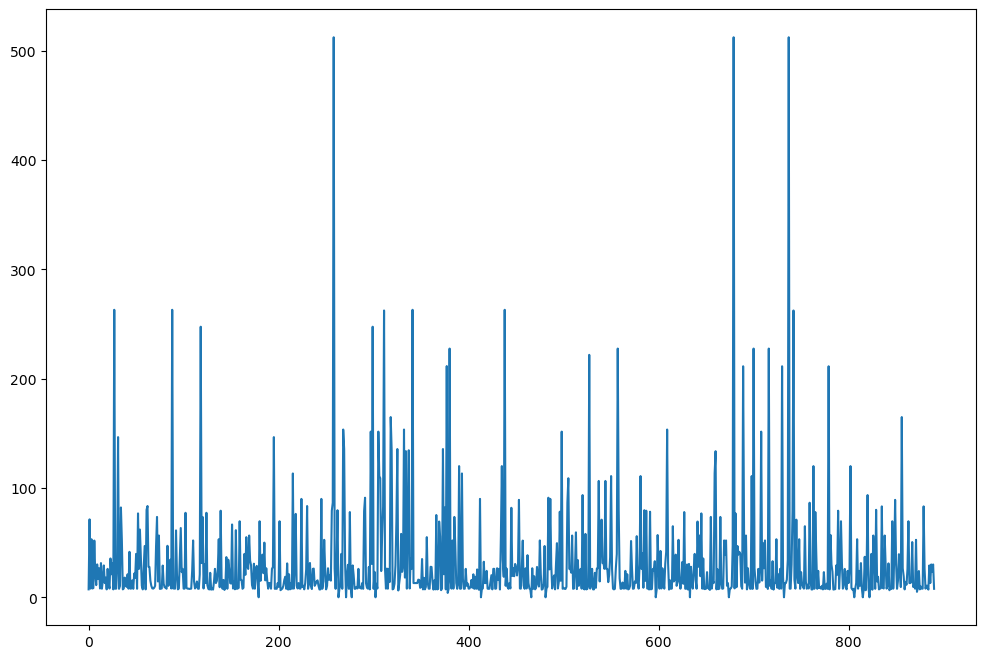

In [138]:
titanic.fare.plot(figsize = (12,8))
plt.show()

In [139]:
titanic.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [147]:
titanic.fare.sort_values(ascending=False)

258    250.0
88     250.0
311    250.0
27     250.0
341    250.0
       ...  
633      0.0
413      0.0
822      0.0
732      0.0
674      0.0
Name: fare, Length: 891, dtype: float64

In [141]:
fare_cap = 250

In [142]:
titanic.loc[titanic.fare > fare_cap, "fare"] = fare_cap

In [143]:
fare_floor = 5

In [148]:
titanic.loc[titanic.fare < fare_floor, "fare"] = fare_floor

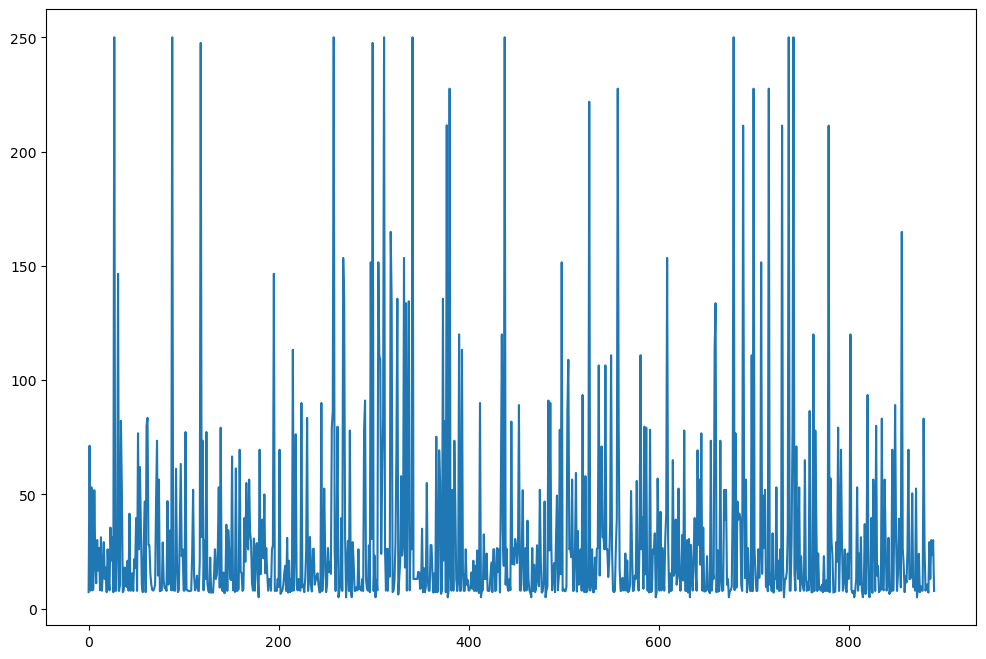

In [149]:
titanic.fare.plot(figsize = (12,8))
plt.show()

we removed the high end and low end outliers

In [150]:
titanic.fare.describe()

count    891.000000
mean      31.320089
std       42.517981
min        5.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      250.000000
Name: fare, dtype: float64

## Scaling / Standardization

In [151]:
titanic

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cat,fare_cat
0,0,Third,male,22.000000,7.2500,S,1,No,No,young_adult,very_cheap
1,1,First,female,38.000000,71.2833,C,1,No,No,adult,exp
2,1,Third,female,26.000000,7.9250,S,0,Yes,No,young_adult,moderate
3,1,First,female,35.000000,53.1000,S,1,No,No,adult,exp
4,0,Third,male,35.000000,8.0500,S,0,Yes,No,adult,moderate
...,...,...,...,...,...,...,...,...,...,...,...
886,0,Second,male,27.000000,13.0000,S,0,Yes,No,young_adult,moderate
887,1,First,female,19.000000,30.0000,S,0,Yes,No,young_adult,exp
888,0,Third,female,29.699118,23.4500,S,3,No,No,young_adult,exp
889,1,First,male,26.000000,30.0000,C,0,Yes,No,young_adult,exp


In [152]:
titanic.describe()

,survived,age,fare,no_relat
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,31.320089,0.904602
std,0.486592,13.002015,42.517981,1.613459
min,0.000000,0.420000,5.000000,0.000000
25%,0.000000,22.000000,7.910400,0.000000
50%,0.000000,29.699118,14.454200,0.000000
75%,1.000000,35.000000,31.000000,1.000000
max,1.000000,80.000000,250.000000,10.000000


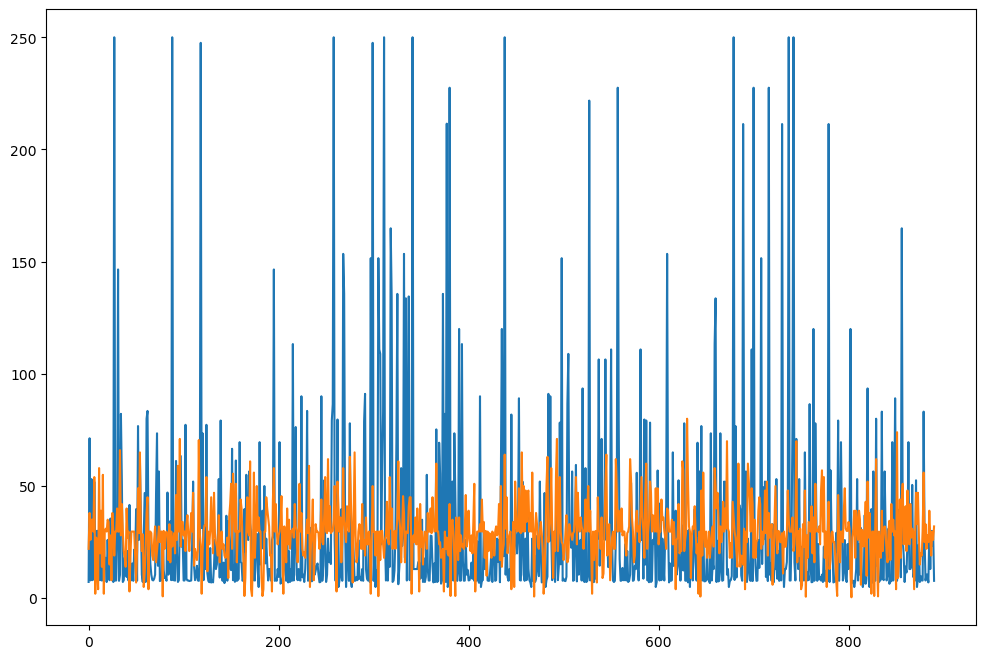

In [153]:
titanic.fare.plot(figsize = (12, 8))
titanic.age.plot(figsize = (12, 8))
plt.show()

In [154]:
mean_age = titanic.age.mean()
mean_fare = titanic.fare.mean()

In [155]:
std_age = titanic.age.std()
std_fare = titanic.fare.std()

In [156]:
titanic["age_z"] = (titanic.age - mean_age) / std_age
titanic["fare_z"] = (titanic.fare - mean_fare) / std_fare

In [157]:
titanic

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cat,fare_cat,age_z,fare_z
0,0,Third,male,22.000000,7.2500,S,1,No,No,young_adult,very_cheap,-0.592148,-0.566116
1,1,First,female,38.000000,71.2833,C,1,No,No,adult,exp,0.638430,0.939913
2,1,Third,female,26.000000,7.9250,S,0,Yes,No,young_adult,moderate,-0.284503,-0.550240
3,1,First,female,35.000000,53.1000,S,1,No,No,adult,exp,0.407697,0.512252
4,0,Third,male,35.000000,8.0500,S,0,Yes,No,adult,moderate,0.407697,-0.547300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,Second,male,27.000000,13.0000,S,0,Yes,No,young_adult,moderate,-0.207592,-0.430879
887,1,First,female,19.000000,30.0000,S,0,Yes,No,young_adult,exp,-0.822881,-0.031048
888,0,Third,female,29.699118,23.4500,S,3,No,No,young_adult,exp,0.000000,-0.185100
889,1,First,male,26.000000,30.0000,C,0,Yes,No,young_adult,exp,-0.284503,-0.031048


In [158]:
round(titanic.describe(), 2)

,survived,age,fare,no_relat,age_z,fare_z
count,891.00,891.00,891.00,891.00,891.00,891.00
mean,0.38,29.70,31.32,0.90,0.00,0.00
std,0.49,13.00,42.52,1.61,1.00,1.00
min,0.00,0.42,5.00,0.00,-2.25,-0.62
25%,0.00,22.00,7.91,0.00,-0.59,-0.55
50%,0.00,29.70,14.45,0.00,0.00,-0.40
75%,1.00,35.00,31.00,1.00,0.41,-0.01
max,1.00,80.00,250.00,10.00,3.87,5.14


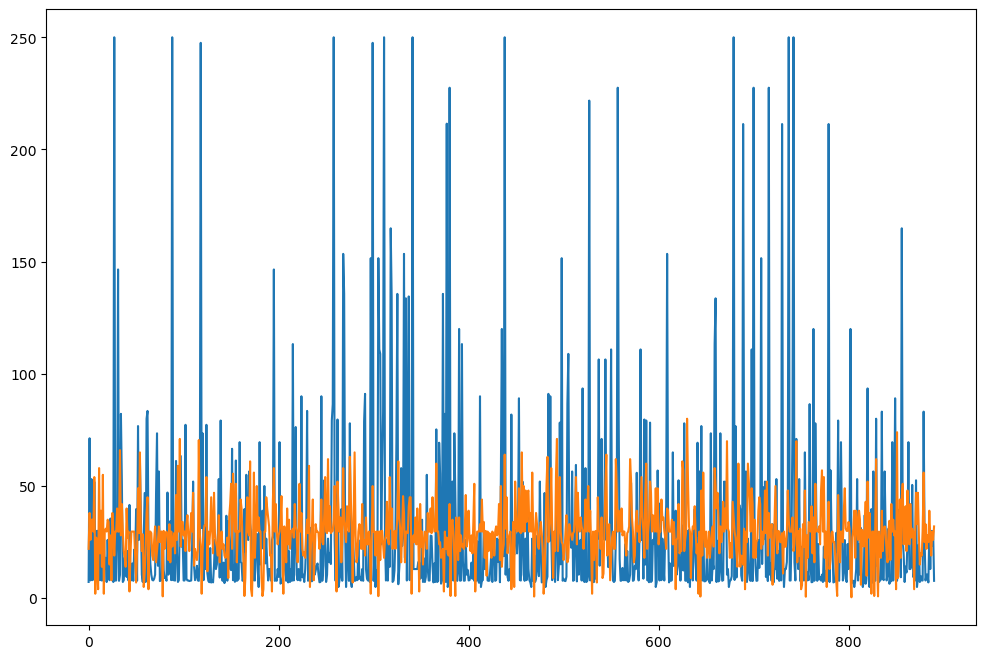

In [159]:
titanic.fare.plot(figsize = (12, 8))
titanic.age.plot(figsize = (12, 8))
plt.show()

## Creating Dummy Variables

In [160]:
titanic

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cat,fare_cat,age_z,fare_z
0,0,Third,male,22.000000,7.2500,S,1,No,No,young_adult,very_cheap,-0.592148,-0.566116
1,1,First,female,38.000000,71.2833,C,1,No,No,adult,exp,0.638430,0.939913
2,1,Third,female,26.000000,7.9250,S,0,Yes,No,young_adult,moderate,-0.284503,-0.550240
3,1,First,female,35.000000,53.1000,S,1,No,No,adult,exp,0.407697,0.512252
4,0,Third,male,35.000000,8.0500,S,0,Yes,No,adult,moderate,0.407697,-0.547300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,Second,male,27.000000,13.0000,S,0,Yes,No,young_adult,moderate,-0.207592,-0.430879
887,1,First,female,19.000000,30.0000,S,0,Yes,No,young_adult,exp,-0.822881,-0.031048
888,0,Third,female,29.699118,23.4500,S,3,No,No,young_adult,exp,0.000000,-0.185100
889,1,First,male,26.000000,30.0000,C,0,Yes,No,young_adult,exp,-0.284503,-0.031048


In [161]:
titanic.drop(labels = ["age", "alone", "child", "age_z", "fare_z", "fare_cat"], axis = 1, inplace = True)

In [163]:
titanic

,survived,pclass,sex,fare,embarked,no_relat,age_cat
0,0,Third,male,7.2500,S,1,young_adult
1,1,First,female,71.2833,C,1,adult
2,1,Third,female,7.9250,S,0,young_adult
3,1,First,female,53.1000,S,1,adult
4,0,Third,male,8.0500,S,0,adult
...,...,...,...,...,...,...,...
886,0,Second,male,13.0000,S,0,young_adult
887,1,First,female,30.0000,S,0,young_adult
888,0,Third,female,23.4500,S,3,young_adult
889,1,First,male,30.0000,C,0,young_adult


In [167]:
pd.get_dummies(titanic, columns = ["sex", "pclass", "embarked", "age_cat"], drop_first = True)

,survived,fare,no_relat,sex_male,pclass_Second,pclass_Third,embarked_Q,embarked_S,age_cat_teenager,age_cat_young_adult,age_cat_adult,age_cat_elderly
0,0,7.2500,1,1,0,1,0,1,0,1,0,0
1,1,71.2833,1,0,0,0,0,0,0,0,1,0
2,1,7.9250,0,0,0,1,0,1,0,1,0,0
3,1,53.1000,1,0,0,0,0,1,0,0,1,0
4,0,8.0500,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,13.0000,0,1,1,0,0,1,0,1,0,0
887,1,30.0000,0,0,0,0,0,1,0,1,0,0
888,0,23.4500,3,0,0,1,0,1,0,1,0,0
889,1,30.0000,0,1,0,0,0,0,0,1,0,0


In [168]:
titanic_d = pd.get_dummies(titanic, columns = ["sex", "pclass", "embarked", "age_cat"], drop_first = True)

In [169]:
titanic_d

,survived,fare,no_relat,sex_male,pclass_Second,pclass_Third,embarked_Q,embarked_S,age_cat_teenager,age_cat_young_adult,age_cat_adult,age_cat_elderly
0,0,7.2500,1,1,0,1,0,1,0,1,0,0
1,1,71.2833,1,0,0,0,0,0,0,0,1,0
2,1,7.9250,0,0,0,1,0,1,0,1,0,0
3,1,53.1000,1,0,0,0,0,1,0,0,1,0
4,0,8.0500,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,13.0000,0,1,1,0,0,1,0,1,0,0
887,1,30.0000,0,0,0,0,0,1,0,1,0,0
888,0,23.4500,3,0,0,1,0,1,0,1,0,0
889,1,30.0000,0,1,0,0,0,0,0,1,0,0


In [170]:
titanic_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   survived             891 non-null    int64  
 1   fare                 891 non-null    float64
 2   no_relat             891 non-null    int64  
 3   sex_male             891 non-null    uint8  
 4   pclass_Second        891 non-null    uint8  
 5   pclass_Third         891 non-null    uint8  
 6   embarked_Q           891 non-null    uint8  
 7   embarked_S           891 non-null    uint8  
 8   age_cat_teenager     891 non-null    uint8  
 9   age_cat_young_adult  891 non-null    uint8  
 10  age_cat_adult        891 non-null    uint8  
 11  age_cat_elderly      891 non-null    uint8  
dtypes: float64(1), int64(2), uint8(9)
memory usage: 28.8 KB


## String Operations

In [172]:
summer = pd.read_csv("summer.csv")

In [173]:
summer

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [174]:
summer.Athlete = summer.Athlete.str.title()

In [175]:
summer.Athlete.str.split(", ", n = 1, expand = True)

,0,1
0,Hajos,Alfred
1,Herschmann,Otto
2,Drivas,Dimitrios
3,Malokinis,Ioannis
4,Chasapis,Spiridon
...,...,...
31160,Janikowski,Damian
31161,Rezaei,Ghasem Gholamreza
31162,Totrov,Rustam
31163,Aleksanyan,Artur


In [176]:
summer[["Surname", "First_Name"]] = summer.Athlete.str.split(", ", n = 1, expand = True)

In [177]:
summer

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Surname,First_Name
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold,Hajos,Alfred
1,1896,Athens,Aquatics,Swimming,"Herschmann, Otto",AUT,Men,100M Freestyle,Silver,Herschmann,Otto
2,1896,Athens,Aquatics,Swimming,"Drivas, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Drivas,Dimitrios
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Malokinis,Ioannis
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Chasapis,Spiridon
...,...,...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"Janikowski, Damian",POL,Men,Wg 84 KG,Bronze,Janikowski,Damian
31161,2012,London,Wrestling,Wrestling Freestyle,"Rezaei, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold,Rezaei,Ghasem Gholamreza
31162,2012,London,Wrestling,Wrestling Freestyle,"Totrov, Rustam",RUS,Men,Wg 96 KG,Silver,Totrov,Rustam
31163,2012,London,Wrestling,Wrestling Freestyle,"Aleksanyan, Artur",ARM,Men,Wg 96 KG,Bronze,Aleksanyan,Artur


In [178]:
summer["Surname"] = summer.Surname.str.strip()

In [179]:
summer["First_Name"] = summer.First_Name.str.strip()

In [180]:
summer.drop(columns = "Athlete")

,Year,City,Sport,Discipline,Country,Gender,Event,Medal,Surname,First_Name
0,1896,Athens,Aquatics,Swimming,HUN,Men,100M Freestyle,Gold,Hajos,Alfred
1,1896,Athens,Aquatics,Swimming,AUT,Men,100M Freestyle,Silver,Herschmann,Otto
2,1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Bronze,Drivas,Dimitrios
3,1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Gold,Malokinis,Ioannis
4,1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Silver,Chasapis,Spiridon
...,...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,POL,Men,Wg 84 KG,Bronze,Janikowski,Damian
31161,2012,London,Wrestling,Wrestling Freestyle,IRI,Men,Wg 96 KG,Gold,Rezaei,Ghasem Gholamreza
31162,2012,London,Wrestling,Wrestling Freestyle,RUS,Men,Wg 96 KG,Silver,Totrov,Rustam
31163,2012,London,Wrestling,Wrestling Freestyle,ARM,Men,Wg 96 KG,Bronze,Aleksanyan,Artur
